In [22]:
import torch
import torchvision
import torchvision.datasets as dataset
from torchvision.transforms import ToTensor
import torch.nn as nn
import matplotlib.pyplot as plt
from torch import optim
from torch.autograd import Variable

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

In [24]:
train_data= dataset.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=ToTensor())

test_data= dataset.MNIST(
    root='./data' ,
    train=False,
    download=True,
    transform=ToTensor())

In [ ]:
print("Training dataset: \n {}".format(train_data))

In [ ]:
print("Testing dataset:\n {}".format(test_data))

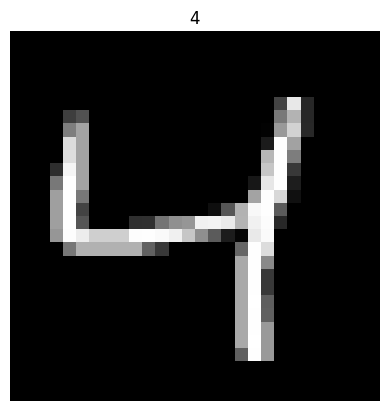

In [27]:
plt.imshow(train_data.data[2], cmap= 'gray')
plt.title('%i' % train_data.targets[2])
plt.axis("off")
plt.show()

In [28]:
loaders = {
    'train' : torch.utils.data.DataLoader(train_data,
                                          batch_size=100,
                                          shuffle=True,
                                          num_workers=1),
    'test': torch.utils.data.DataLoader(test_data,
                                        batch_size=100,
                                        shuffle=True,
                                        num_workers=1)
}

In [29]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN,self).__init__()

    self.conv1 = nn.Sequential(
        nn.Conv2d(
            in_channels=1,
            out_channels=16,
            kernel_size=5,
            stride=1,
            padding=2
        ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.conv2 =nn.Sequential(
        nn.Conv2d(16,32,5,1,2),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )

    self.out= nn.Linear(32*7*7,10)

  def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        x = x.view(x.size(0), -1)
        output = self.out(x)
        return output, x

In [30]:
cnn1=CNN()
cnn2=CNN()
cnn3=CNN()
cnn4=CNN()
cnn5=CNN()

In [31]:
loss_func=nn.CrossEntropyLoss()

In [32]:
adamOptimizer=optim.Adam(cnn1.parameters(),lr=0.00001)
SGDOptimizer=optim.SGD(cnn2.parameters(),lr=0.00001)
SGDMomentumOptimizer = optim.SGD(cnn3.parameters(), lr=0.00001, momentum=0.9)
AdagradOptimizer=optim.Adagrad(cnn4.parameters(),lr=0.00001)
RMSpropOptimizer=optim.RMSprop(cnn5.parameters(),lr=0.00001)

In [33]:
epochs=30

In [34]:
def train(epochs,cnn,loaders,optimizer):
  losses=[]
  cnn.to(device)
  cnn.train()
  total_step=len(loaders['train'])


  for epoch in range(epochs):
    for i,(images,labels) in enumerate(loaders['train']):
      b_x= Variable(images.to(device))
      b_y= Variable(labels.to(device))

      output= cnn(b_x)[0]

      loss= loss_func(output,b_y)
      if (i + 1) == total_step:
                losses.append(loss.item())


      optimizer.zero_grad()

      loss.backward()

      optimizer.step()

      if (i+1)%100==0:
        print('Epoch [{}/{}], Step [{}/{}], Loss:{:.4f}'.format(epoch+1,epochs,i+1, total_step, loss.item()))
        pass
      pass
    pass

  plt.plot(range(1,epochs+1), losses)
  plt.title(f'Loss vs Epoch')
  plt.ylabel('Loss')
  plt.xlabel('epoch')

In [35]:
def test(cnn):
  cnn.eval()
  cnn.to(device)
  with torch.no_grad():
    correct=0
    total=0
    for images, labels in loaders['test']:
      images = images.to(device) # Move data to device
      labels = labels.to(device)
      test_output, last_layer= cnn(images)
      pred_y= torch.max(test_output,1)[1].data.squeeze()
      accuracy = (pred_y == labels).sum().item()/float(labels.size(0))
      pass
    print('Test accuracy of the model on the 10000 test images: %.2f' % accuracy)
    pass

**Adam Optimizer**

In [ ]:
train(epochs,cnn1, loaders, adamOptimizer)

In [ ]:
test(cnn1)

**SGD Optimizer**

In [ ]:
train(epochs,cnn2, loaders, SGDOptimizer)

In [ ]:
test(cnn2)

**SGD with Momentum**

In [ ]:
train(epochs,cnn3, loaders, SGDMomentumOptimizer)

In [ ]:
test(cnn3)

**Adagrad Optimizer**

In [ ]:
train(epochs,cnn4, loaders, AdagradOptimizer)

In [ ]:
test(cnn4)

**RMSprop Optimizer**

In [ ]:
train(epochs,cnn5, loaders, RMSpropOptimizer)

In [ ]:
test(cnn5)